In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

train_images = train_images.reshape((60000, 28, 28))
test_images = test_images.reshape((10000, 28, 28))

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Build the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'), #ReLU (Rectified Linear Activation)
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and store history for visualization
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
750/750 [==============================] - 5s 5ms/step - loss: 0.3224 - accuracy: 0.9064 - val_loss: 0.1755 - val_accuracy: 0.9494
Epoch 2/5
750/750 [==============================] - 4s 5ms/step - loss: 0.1306 - accuracy: 0.9618 - val_loss: 0.1106 - val_accuracy: 0.9677
Epoch 3/5
750/750 [==============================] - 5s 6ms/step - loss: 0.0885 - accuracy: 0.9734 - val_loss: 0.1081 - val_accuracy: 0.9677
Epoch 4/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0661 - accuracy: 0.9794 - val_loss: 0.1055 - val_accuracy: 0.9674
Epoch 5/5
750/750 [==============================] - 5s 7ms/step - loss: 0.0502 - accuracy: 0.9840 - val_loss: 0.0901 - val_accuracy: 0.9755


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Predict on test images
predictions = model.predict(test_images)


313/313 [==============================] - 1s 2ms/step - loss: 0.0886 - accuracy: 0.9734
Test accuracy: 0.9733999967575073
313/313 [==============================] - 1s 2ms/step


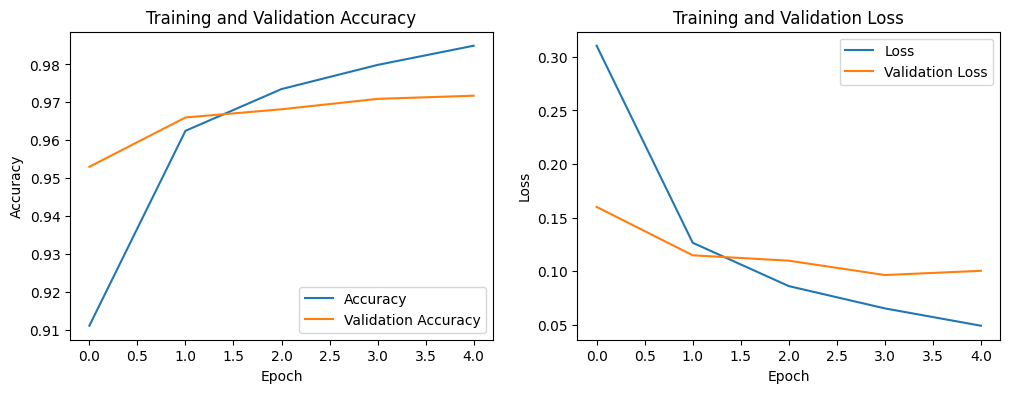

In [ ]:
# Function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

plot_training_history(history)


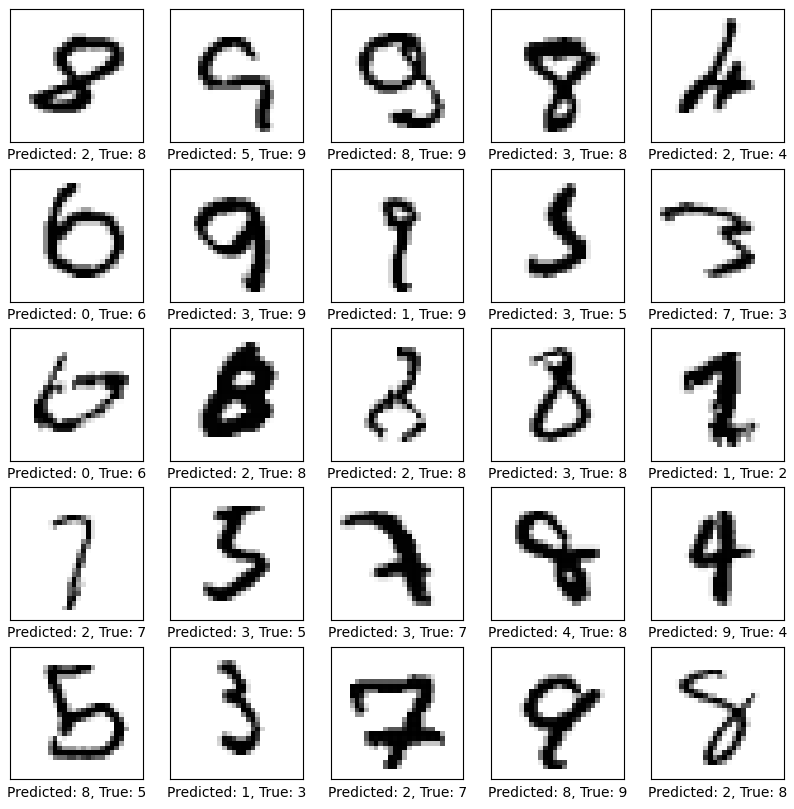

In [ ]:
# Function to display misclassified images
def show_misclassified_images(predictions, test_images, test_labels):
    misclassified_indexes = []
    for i in range(len(predictions)):
        if np.argmax(predictions[i]) != np.argmax(test_labels[i]):
            misclassified_indexes.append(i)

    plt.figure(figsize=(10, 10))
    for i, index in enumerate(misclassified_indexes[:25]):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(test_images[index], cmap=plt.cm.binary)
        predicted_label = np.argmax(predictions[index])
        true_label = np.argmax(test_labels[index])
        plt.xlabel(f'Predicted: {predicted_label}, True: {true_label}')
    plt.show()

show_misclassified_images(predictions, test_images, test_labels)


interactive(children=(IntSlider(value=0, description='Image index:', max=9999), Output()), _dom_classes=('widg…

<function __main__.interactive_image(index)>

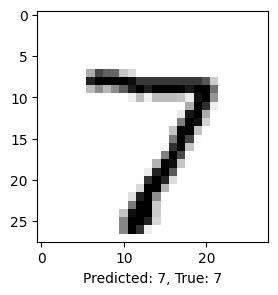

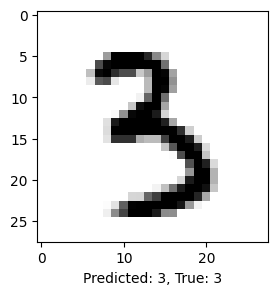

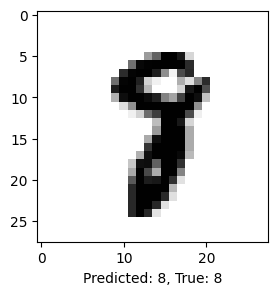

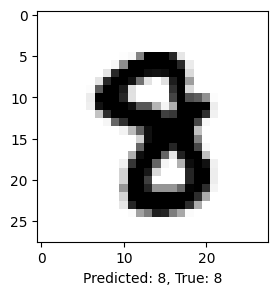

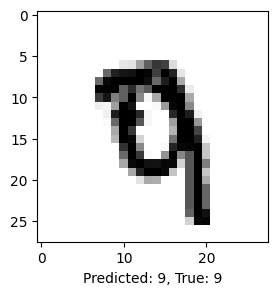

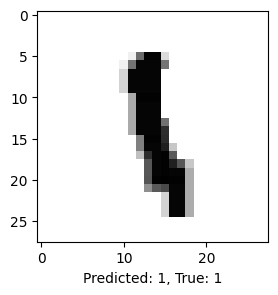

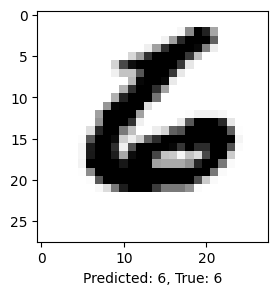

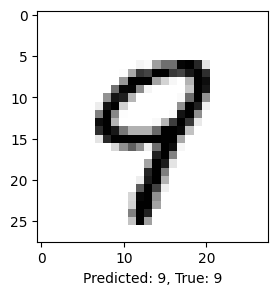

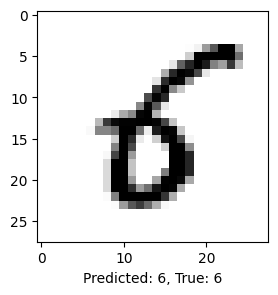

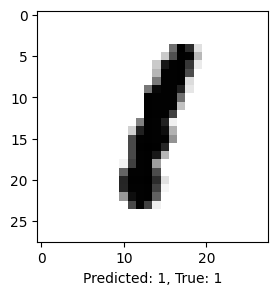

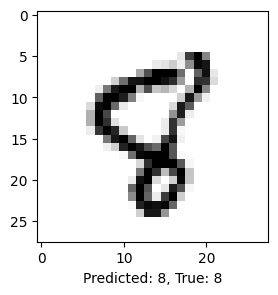

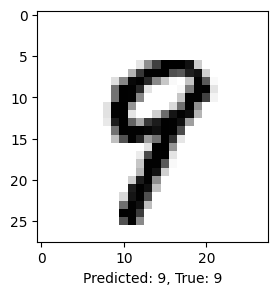

In [ ]:
import ipywidgets as widgets
from IPython.display import display

def interactive_image(index):
    plt.figure(figsize=(3, 3))
    plt.imshow(test_images[index], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[index])
    true_label = np.argmax(test_labels[index])
    plt.xlabel(f'Predicted: {predicted_label}, True: {true_label}')
    display(plt.gcf())

index_slider = widgets.IntSlider(
    min=0,
    max=len(test_images) - 1,
    step=1,
    value=0,
    description='Image index:',
)

widgets.interact(interactive_image, index=index_slider)